In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\skillmigration\skill_migration_public.csv")
df.head(10)

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64
5,af,Afghanistan,Low income,South Asia,3139,Disruptive Tech Skills,Materials Science,-1085.03,-1045.71,-783.03,-473.42,-717.73
6,af,Afghanistan,Low income,South Asia,1315,Specialized Industry Skills,Criminal Law,-687.80,-294.93,-769.01,-415.34,-698.84
7,af,Afghanistan,Low income,South Asia,1017,Soft Skills,Problem Solving,-906.42,-210.44,-480.92,-126.62,-696.16
8,af,Afghanistan,Low income,South Asia,2130,Tech Skills,Software Development Life Cycle (SDLC),-1096.96,-566.70,-478.30,-324.99,-692.24
9,af,Afghanistan,Low income,South Asia,2265,Specialized Industry Skills,Cybersecurity,-1046.26,-796.25,-796.72,-517.62,-640.96


In [3]:
df.tail()


,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
17612,zw,Zimbabwe,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,71.18,30.68,-18.85,-68.89,-93.70
17613,zw,Zimbabwe,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,8.97,-112.85,-35.87,-65.38,-93.46
17614,zw,Zimbabwe,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-53.45,-59.70,-88.01,-55.90,-82.23
17615,zw,Zimbabwe,Low income,Sub-Saharan Africa,1724,Specialized Industry Skills,Public Health,15.25,-65.53,-57.22,-39.39,-32.14
17616,zw,Zimbabwe,Low income,Sub-Saharan Africa,172,Specialized Industry Skills,Law,40.85,47.16,-31.24,-8.24,-25.52


The goal is to get the best skills to learn in Nigeria and the world presently
1. whats the best tech category to go into in the world and in Nigeria
2. low income vs high income
3. what income has the highest adoption of tech skills

The net per columns are not undestandable and most immportantly not relevant to our analysis, so we delete them

In [4]:
df = df.drop(['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019'], axis = 1)

we have another irrelevant column skill group_id


In [5]:
df = df.drop(['skill_group_id'], axis=1)
df

,country_code,country_name,wb_income,wb_region,skill_group_category,skill_group_name
0,af,Afghanistan,Low income,South Asia,Tech Skills,Information Management
1,af,Afghanistan,Low income,South Asia,Business Skills,Operational Efficiency
2,af,Afghanistan,Low income,South Asia,Specialized Industry Skills,National Security
3,af,Afghanistan,Low income,South Asia,Tech Skills,Software Testing
4,af,Afghanistan,Low income,South Asia,Specialized Industry Skills,Navy
...,...,...,...,...,...,...
17612,zw,Zimbabwe,Low income,Sub-Saharan Africa,Specialized Industry Skills,Teaching
17613,zw,Zimbabwe,Low income,Sub-Saharan Africa,Specialized Industry Skills,Mining
17614,zw,Zimbabwe,Low income,Sub-Saharan Africa,Specialized Industry Skills,Personal Coaching
17615,zw,Zimbabwe,Low income,Sub-Saharan Africa,Specialized Industry Skills,Public Health


In [6]:
df.isnull().sum()

country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_category    0
skill_group_name        0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Normalize Data types

In [8]:
df.dtypes

country_code            object
country_name            object
wb_income               object
wb_region               object
skill_group_category    object
skill_group_name        object
dtype: object

## Every column should be strings

In [9]:
df = df.astype('string')

In [10]:
df.dtypes

country_code            string[python]
country_name            string[python]
wb_income               string[python]
wb_region               string[python]
skill_group_category    string[python]
skill_group_name        string[python]
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17617 entries, 0 to 17616
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country_code          17617 non-null  string
 1   country_name          17617 non-null  string
 2   wb_income             17617 non-null  string
 3   wb_region             17617 non-null  string
 4   skill_group_category  17617 non-null  string
 5   skill_group_name      17617 non-null  string
dtypes: string(6)
memory usage: 825.9 KB


In [12]:
df.describe()

,country_code,country_name,wb_income,wb_region,skill_group_category,skill_group_name
count,17617,17617,17617,17617,17617,17617
unique,140,140,4,7,5,249
top,us,United States,High income,Europe & Central Asia,Specialized Industry Skills,Digital Literacy
freq,249,249,8904,6222,9712,140


In [13]:
df['wb_income'].unique()

<StringArray>
['Low income', 'Upper middle income', 'Lower middle income', 'High income']
Length: 4, dtype: string

In [14]:
df['skill_group_category'].unique()

<StringArray>
[                'Tech Skills',             'Business Skills',
 'Specialized Industry Skills',      'Disruptive Tech Skills',
                 'Soft Skills']
Length: 5, dtype: string

to get the highest skills category, to know the highest skill category

In [15]:
skillscat_count = df['skill_group_category'].value_counts()
skillscat_count

skill_group_category
Specialized Industry Skills    9712
Business Skills                4078
Tech Skills                    2002
Soft Skills                    1081
Disruptive Tech Skills          744
Name: count, dtype: Int64

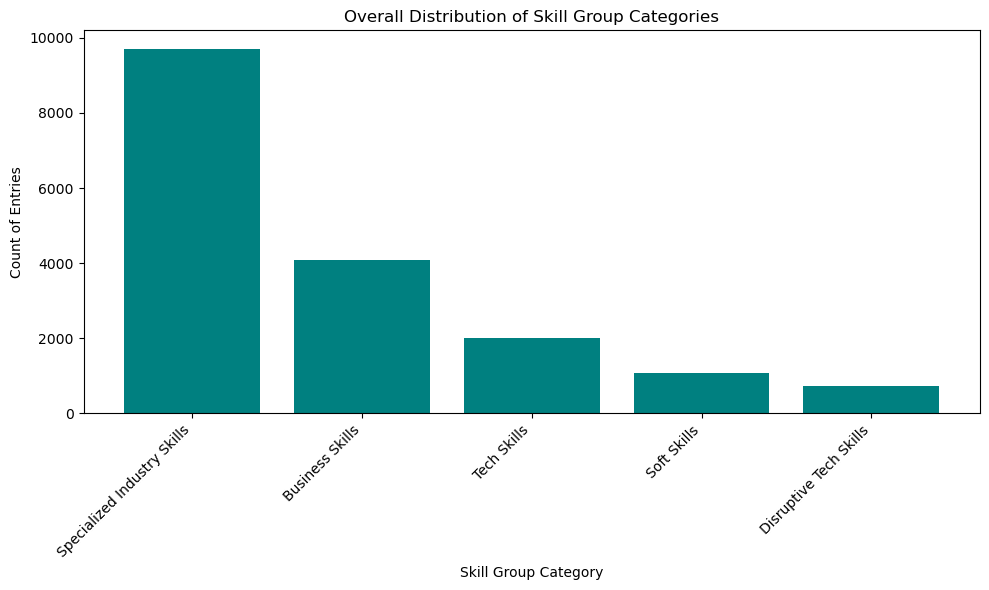

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(skillscat_count.index, skillscat_count.values, color='teal')
plt.title('Overall Distribution of Skill Group Categories')
plt.xlabel('Skill Group Category')
plt.ylabel('Count of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('skill_category_distribution.png')
plt.show()

Specialized Industry skills have a higher percentage globally

In [37]:
skills_count = df['skill_group_name'].value_counts()
skills_count

skill_group_name
Digital Literacy         140
Research                 140
Communication            140
Social Media             140
Procurement              140
                        ... 
Constitutional Law         6
Reading Comprehension      3
Fishing                    2
Professional Cleaning      2
FinTech                    2
Name: count, Length: 249, dtype: Int64

Top 15 Specific Skills:
 skill_group_name
Digital Literacy                   140
Research                           140
Communication                      140
Social Media                       140
Procurement                        140
Employee Learning & Development    140
Product Marketing                  140
Project Management                 140
Leadership                         140
Business Management                140
Foreign Languages                  140
Negotiation                        140
Public Policy                      139
Data Science                       139
Manufacturing Operations           139
Name: count, dtype: Int64


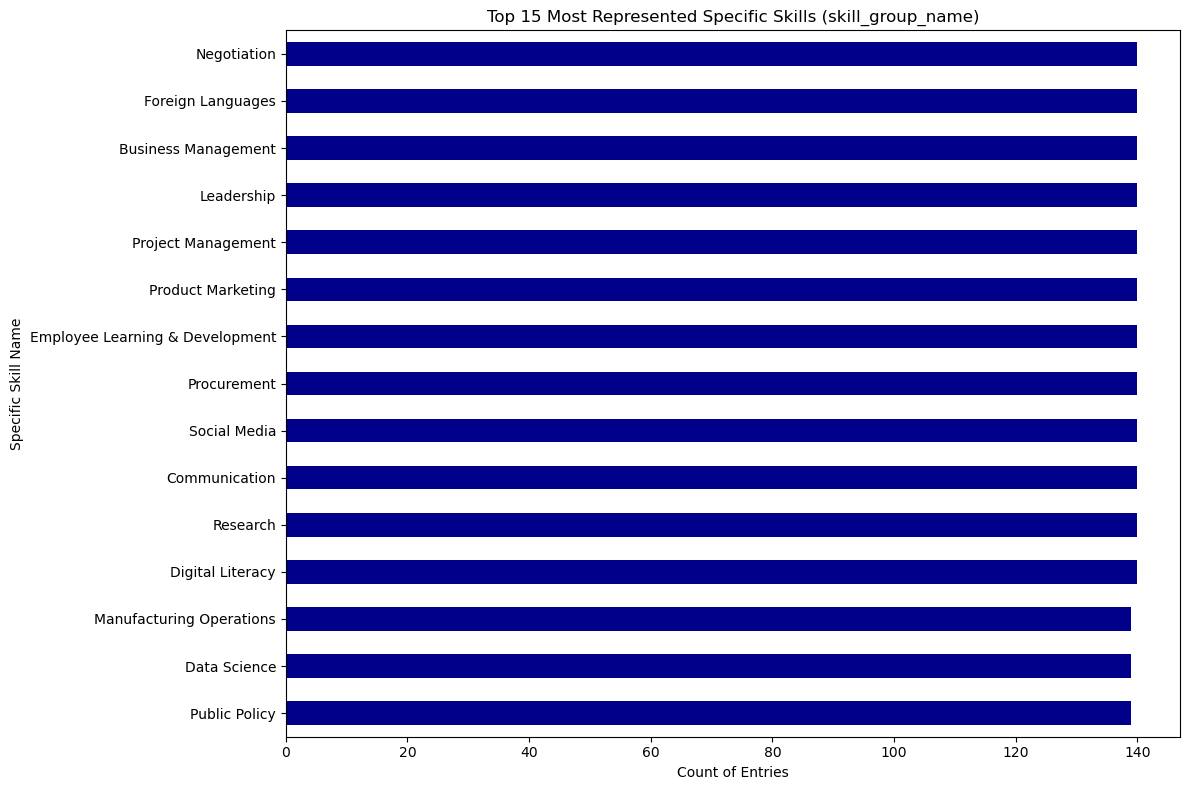

In [42]:
top_15_skills = skills_count.head(15)
# Display the top 15 list
print("Top 15 Specific Skills:\n", top_15_skills)

plt.figure(figsize=(12, 8))
top_15_skills.sort_values(ascending=True).plot(kind='barh', color='darkblue')
plt.title('Top 15 Most Represented Specific Skills (skill_group_name)')
plt.xlabel('Count of Entries')
plt.ylabel('Specific Skill Name')
plt.tight_layout()
plt.show()
plt.savefig('top_15_skills_bar_chart.png')
plt.close()

DATA SCIENCE IS AMONG THE TOP 15 SKILLS LEARNT ALL OVER THE WORLD

# Question 1: Best Tech Category in the World and in Nigeria

In [18]:
# Global Tech Skills Analysis
tech_categories = ['Tech Skills', 'Disruptive Tech Skills']
global_tech_skills = df[df['skill_group_category'].isin(tech_categories)]
global_top_skills = global_tech_skills['skill_group_name'].value_counts().head(5)
print("Global Top Tech Skills:\n", global_top_skills)

Global Top Tech Skills:
 skill_group_name
Digital Literacy             140
Social Media                 140
Data Science                 139
Graphic Design               138
Data Storage Technologies    133
Name: count, dtype: Int64


In [20]:
# Nigeria Tech Skills Analysis
nigeria_tech_skills = global_tech_skills[global_tech_skills['country_name'] == 'Nigeria']
nigeria_top_skills = nigeria_tech_skills['skill_group_name'].value_counts().head(10)
print("\nNigeria Top Tech Skills:\n", nigeria_top_skills)


Nigeria Top Tech Skills:
 skill_group_name
Software Development Life Cycle (SDLC)    1
Enterprise Software                       1
Software Testing                          1
Data Storage Technologies                 1
Information Management                    1
Mobile Application Development            1
Genetic Engineering                       1
Development Tools                         1
Scientific Computing                      1
Data Science                              1
Name: count, dtype: Int64


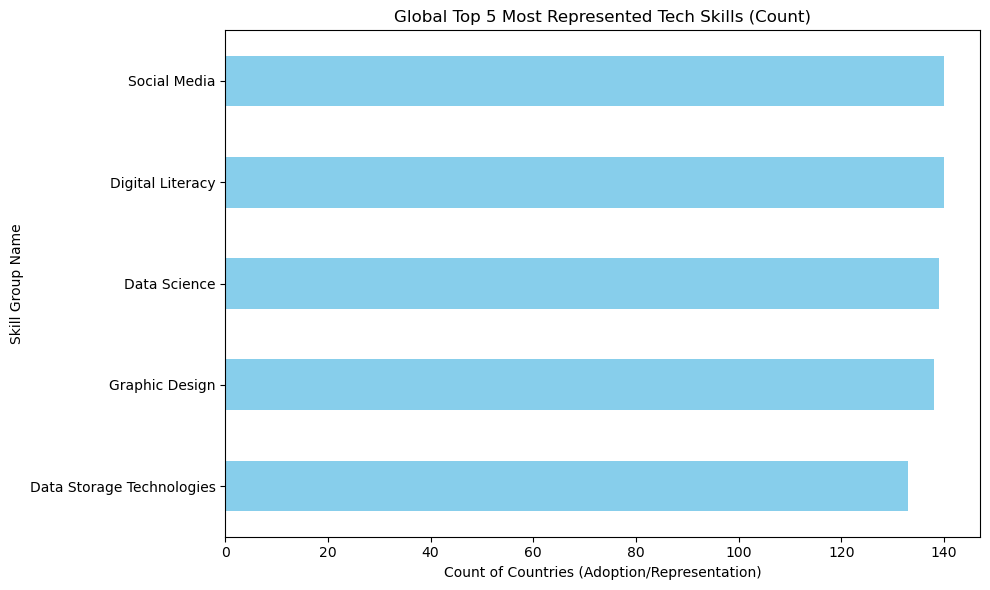

In [27]:
# Plot 1: Global Top Tech Skills (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
global_top_skills.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Global Top 5 Most Represented Tech Skills (Count)')
plt.xlabel('Count of Countries (Adoption/Representation)')
plt.ylabel('Skill Group Name')
plt.tight_layout()
#plt.savefig('global_top_tech_skills_bar.png')
#plt.close()
plt.show()

DATA SCIENCE IS AMONG THE TOP 5 TECH SKILLS IN THE WORLD WITH 139 ENTRIES 

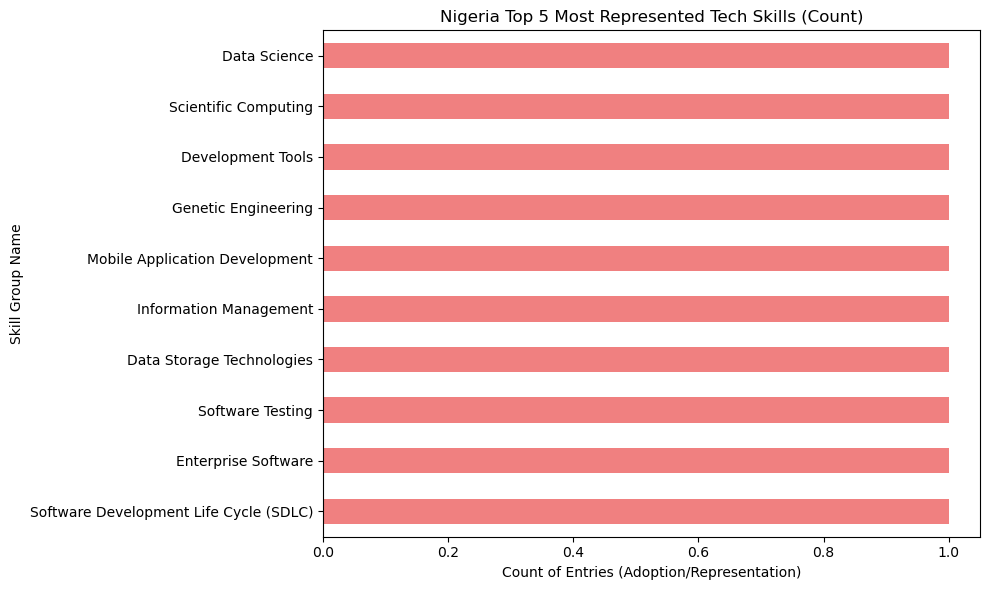

In [29]:
#Nigeria Top Tech Skills 
plt.figure(figsize=(10, 6))
nigeria_top_skills.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Nigeria Top 5 Most Represented Tech Skills (Count)')
plt.xlabel('Count of Entries (Adoption/Representation)')
plt.ylabel('Skill Group Name')
plt.tight_layout()
#plt.savefig('nigeria_top_tech_skills_bar.png')
#plt.close()
plt.show()

DATA SCIENCE IS STILL IN TOP 15 IN NIGERIA

# Question 2: Low income vs High income skill category comparison

In [21]:
# Filter for the two income groups
low_income_df = df[df['wb_income'] == 'Low income']
high_income_df = df[df['wb_income'] == 'High income']

In [22]:
# Calculate value counts for each and convert to percentages
low_income_counts = low_income_df['skill_group_category'].value_counts()
low_income_percent = (low_income_counts / low_income_counts.sum()) * 100

high_income_counts = high_income_df['skill_group_category'].value_counts()
high_income_percent = (high_income_counts / high_income_counts.sum()) * 100

print("\nLow Income Skill Category Distribution (Count and %):\n", pd.DataFrame({'Count': low_income_counts, 'Percentage': low_income_percent}))
print("\nHigh Income Skill Category Distribution (Count and %):\n", pd.DataFrame({'Count': high_income_counts, 'Percentage': high_income_percent}))


Low Income Skill Category Distribution (Count and %):
                              Count  Percentage
skill_group_category                          
Specialized Industry Skills    481   42.267135
Business Skills                361    31.72232
Tech Skills                    156    13.70826
Soft Skills                    101     8.87522
Disruptive Tech Skills          39    3.427065

High Income Skill Category Distribution (Count and %):
                              Count  Percentage
skill_group_category                          
Specialized Industry Skills   5282   59.321653
Business Skills               1837   20.631177
Tech Skills                    925   10.388589
Soft Skills                    477    5.357143
Disruptive Tech Skills         383    4.301438


<Figure size 1200x700 with 0 Axes>

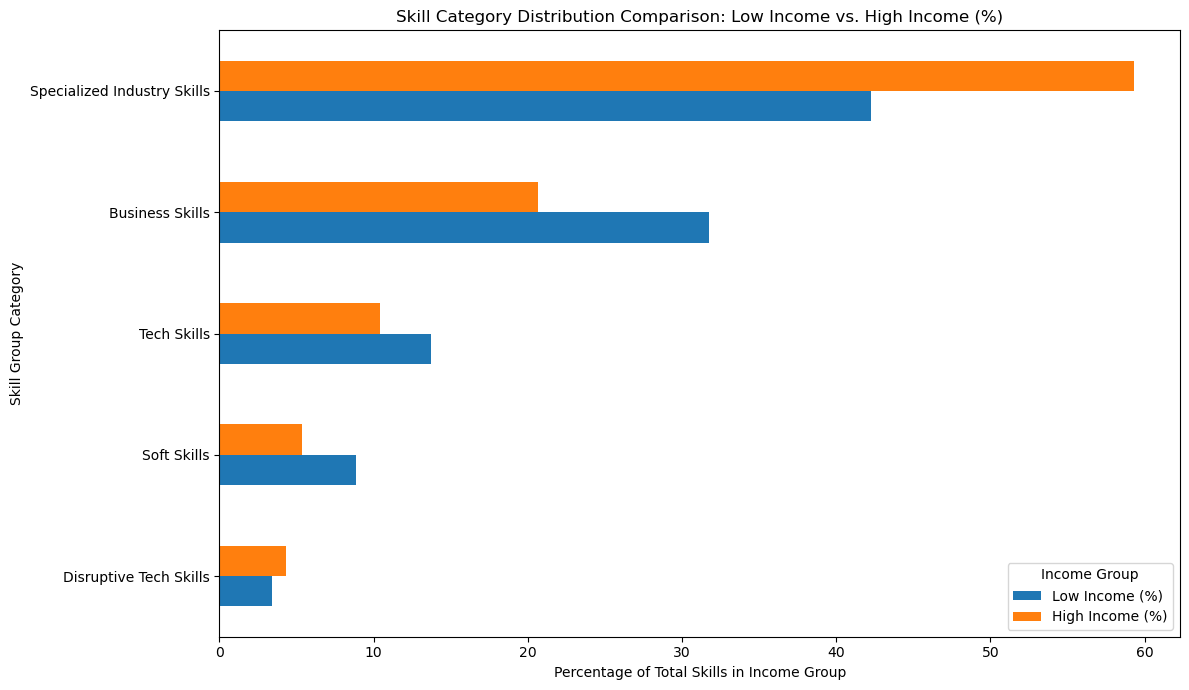

In [31]:
# Combine data for plotting
comparison_df = pd.DataFrame({
    'Low Income (%)': low_income_percent,
    'High Income (%)': high_income_percent
}).fillna(0) 

# Plot 3: Low vs. High Income Skill Category Comparison (Grouped Horizontal Bar Chart)
plt.figure(figsize=(12, 7))
comparison_df.sort_values(by='High Income (%)', ascending=True).plot(kind='barh', figsize=(12, 7))
plt.title('Skill Category Distribution Comparison: Low Income vs. High Income (%)')
plt.xlabel('Percentage of Total Skills in Income Group')
plt.ylabel('Skill Group Category')
plt.legend(title='Income Group')
plt.tight_layout()
#plt.savefig('income_skill_comparison_bar.png')
#plt.close()
plt.show()

 Specialized Industry skills is the biggest category and it has a higher distribution in high income countries


 High income countries adopt specialized industry skills more than low income countries and Low income countries adopt other skills more

# Question 3: What income has the highest adoption of tech skills?

In [23]:
# Filter for tech-related skills and group by income level
all_tech_skills = df[df['skill_group_category'].isin(tech_categories)]
tech_adoption_by_income = all_tech_skills.groupby('wb_income')['skill_group_name'].count().sort_values(ascending=False)
print("\nTech Skill Adoption by WB Income Group:\n", tech_adoption_by_income)


Tech Skill Adoption by WB Income Group:
 wb_income
High income            1308
Upper middle income     709
Lower middle income     534
Low income              195
Name: skill_group_name, dtype: int64


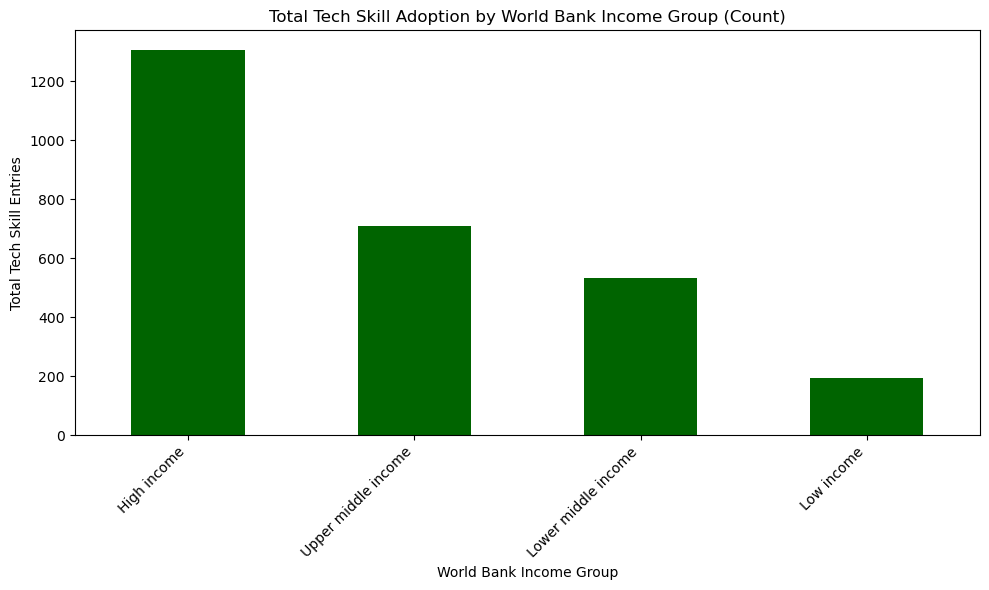

In [33]:
# Plot 4: Tech Skill Adoption by WB Income Group (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
tech_adoption_by_income.plot(kind='bar', color='darkgreen')
plt.title('Total Tech Skill Adoption by World Bank Income Group (Count)')
plt.xlabel('World Bank Income Group')
plt.ylabel('Total Tech Skill Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('tech_adoption_by_income_bar.png')
#plt.close()
plt.show()

Tech skills are highly Adopted in high income countries 